RECOGNISING HANDWRITTEN DIGITS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Preparation

In [2]:
df = pd.read_csv("Desktop/mnist_train.csv")

In [3]:
print(df.shape)

(60000, 785)


In [4]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

split = int(0.8*X.shape[0])
X_train = X.iloc[:split,:]
Y_train = Y.iloc[:split]
X_test = X.iloc[split:,:]
Y_test = Y.iloc[split:]
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualisation

In [6]:
Y_test = np.array(Y_test).reshape(1,-1)[0]

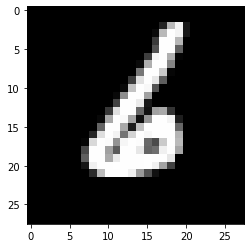

6

In [7]:
sample = np.array(X_test.iloc[5,:])
img = sample.reshape((28,28))
plt.imshow(img,cmap = 'gray')
plt.show()
Y_test[5]

In [8]:
Y_train = np.array(Y_train).reshape(1,-1)[0]

In [9]:
Y_train.shape

(48000,)

In [10]:
Y_train.shape

(48000,)

K-NN Algorithm

In [11]:
def dist(x1,x2):
    return np.sqrt(sum((x2-x1)**2))
def knn(x,y,queryP,k=10):
    vals = []
    m = x.shape[0]
    for i in range(m):
        d = dist(queryP,x.iloc[i,:])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,],return_counts= True)#tuple of arrays
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

Accuracy

In [ ]:
m = X_test.shape[0]
c=0
for i in range(m):
    pred = knn(X_train,Y_train,X_test.iloc[i,:])
    if(pred!=Y_test[i]):
        c=c+1
print(c/m)